In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    scalar.append('eta_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
dataFiles = ["$HOME/EIC/output/102.root"]
a = getData(dataFiles)


Processed $HOME/EIC/output/102.root in 54.7 seconds


In [4]:
b = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
b = applyCut(b, 'Q2 > 25', 'Q2 > 25')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

0.1 < y < 0.85 6783540  fraction kept: 18.7
Q2 > 25 785883  fraction kept: 11.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 220056  fraction kept: 28.0

Remove extra jets 146644  fraction kept: 66.6


In [5]:
print max(b1['pt_electron']), max(b['pt_jet'])

38.4096260071 36.9280471802


In [7]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
    
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

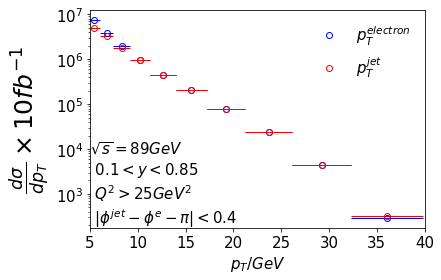

In [9]:
#fig = plt.figure(figsize=(10,8))
plt.errorbar(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T / GeV$', fontsize=15)
plt.ylabel(r'$\frac{d\sigma}{dp_T} \times 10fb^{-1}$', fontsize=25)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(5,2e2,'$\sqrt{s} = 89 GeV$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 GeV^2$ \n $|\phi^{jet} - \phi^e - \pi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_electron_jet_10fb-1.pdf', bbox_inches='tight')

In [15]:
dataFiles = ["$HOME/EIC/output/1010.root"]
b = getData(dataFiles)


Processed $HOME/EIC/output/1010.root in 71.3 seconds


In [16]:
a1 = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
a1 = applyCut(a1, 'Q2 > 25', 'Q2 > 25')
a1 = fixPhi(a1, 'photon')
a1 = applyCut(a1, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

0.1 < y < 0.85 6783540  fraction kept: 18.7
Q2 > 25 785883  fraction kept: 11.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 220056  fraction kept: 28.0


In [17]:
b1 = applyCut(b, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
b1 = applyCut(b1, 'Q2 > 25', 'Q2 > 25')
b1 = fixPhi(b1, 'photon')
b1 = applyCut(b1, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

0.1 < y < 0.85 6870983  fraction kept: 18.6
Q2 > 25 800080  fraction kept: 11.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 218504  fraction kept: 27.3


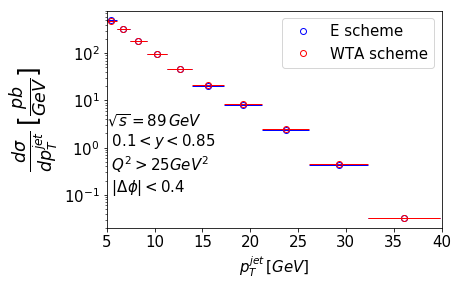

In [22]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xseca = np.mean(a['xsec'])
xsecb = np.mean(b['xsec'])
ntrials = b['ntrials'][b.shape[0]-1]
    
x1, y1, xerr = getHist(a1, 'pt_jet', xvar_array)
x2, y2, xerr = getHist(b1, 'pt_jet', xvar_array)

plt.errorbar(x1, y1*xsec*1e9/(2*ntrials*xerr), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, y1*xseca*1e9/(2*ntrials*xerr), 'bo', fillstyle='none', label='E scheme')
plt.errorbar(x2, y2*xsec*1e9/(2*ntrials*xerr), xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, y2*xsecb*1e9/(2*ntrials*xerr), 'ro', fillstyle='none', label='WTA scheme')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T^{jet} \, [GeV]$', fontsize=15)
plt.ylabel(r'$\frac{d\sigma}{dp_T^{jet}} \, [\frac{pb}{GeV}]$', fontsize=25)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=True, loc='best')
plt.text(5,0.1,'$\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 GeV^2$ \n $|\Delta\phi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_jet_e_wta.pdf', bbox_inches='tight')